In [ ]:
# install dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

## 1.1 Gender Bias Analysis

Explanation:
The intercept (beta_0) is not influencing the model regarding a gender bias, since the intercept is equal for femal and male graduates.
The GPA (beta_1) and IQ (beta_2) coefficients are not influencial regarding gender bias as well for the same reason.
The gender coefficient (beta_3) indeed influences the bias. Since females are decoded with value 1 and males with value 0, the predicted salary is positively influenced for females by this coefficient. This means that if GPA and IQ are equal for a male and a female, the female will have starting salary that is 10,000 Euros higher.
The first interaction term between GPA and IQ again has no influence on gender bias since it does not incorporate a dependency of the gender.
On the other hand the interaction between GPA and Gender (beta_5) is influencing the salary with regard to the persons gender again. This time females are penalized by by the factor of their GPA*(-3) and males are not effected by this negative coefficient. This means that with a unit increase of one for a female, the starting salary becomes 3,000 Euro less, which implies a gender bias against females with higher GPAs. In conclusion, this model shows gender bias against males when GPA and IQ are equal and low and gender bias against females with a high GPA.

## 1.2 Model Conversion
Since we do not have actual data points and only one binary variable, the only possible split for such a model tree is regarding the gender feature. So we can split the tree at gender (x_3) < 0.5 for male and gender(x_3) >= 0.5 for female.
Therefore after the root node, which considers all data, we split according to the gender. E.g. go to the left branch if gender is < 0.5 (male) and go to the right branch if gender is >= 0.5 (female). This leads to to a specific regression model at each new branch. For male we have the coefficients intercept (beta_0) = 50, GPA (beta_1) = 20, IQ (beta_2) = 0.07, and GPA x IQ (beta_4) = 0.01. The coeffients for gender (beta_3) and GPA x gender (beta_5) do not appear in this model since they have no influence for males. For females the tree results in a regression model with coefficients intercept (beta_0) = 50, GPA (beta_1) = 20, IQ (beta_2) = 0.07, gender (beta_3) = 10, GPA x IQ (beta_4) = 0.01, and GPA x gender (beta_5) = -3.

## 2.1 First Data Generation
n this exercise, you are tasked with creating simulated data and fitting sim-
ple linear regression modesl to that data.To create the data use the random
module from numpy. You can study the module on:
https://numpy.org/doc/stable/reference/random/index.html
Make sure to run function random.seed(seed) prior to data generating and
model fitting to ensure consistent experimental results for a fixed value of
the variable seed. Use value of 42 for seed.

Follow the steps below:
1. Using the random.normal function, create a vector x containing 100
observations drawn from a normal distribution with a mean of 0.0 and
a variance of 1.
2. Using the random.normal function, create a vector eps containing 100
observations drawn from a normal distribution with a mean of 0.0 and
a variance of 0.25.
3. Using x and eps, generate a vector y according to the model:
y = −0.5 + 0.75x + eps
a What is the length of the vector y?
b What are the values of β0 and β1 in this linear model?

In [ ]:
np.random.seed(42)
# 1. creating vector x containing 100 observations drawn from a normal distribution with mean 0 and varaince of 1
x = np.random.normal(0,1, size=(100)).reshape((-1, 1))

# 2. create vector eps containing 100 observations drawn from normal distribution with mean 0 and variance 0.25
eps = np.random.normal(0, np.sqrt(0.25), size=(100)).reshape((-1, 1))

# 3 generate vector according to model y = -0.5+0.75x+eps
y = -0.5 + 0.75*x + eps
#print(f"y: {y}")

# a) length of y
print(f"Length of y: {len(y)}")

# b) what are the values of beta_0 and b_1 in this linear model?
# The value of beta_0 is the intercept -0.5 and beta_1 is 0.75

Length of y: 100


b) The value of beta_0 is the intercept -0.5 and beta_1 is 0.75

## 2.2 First Data Visualization
Create a scatterplot displaying the relationship between x and y. Comment
on what you observe.

Text(0, 0.5, 'y')

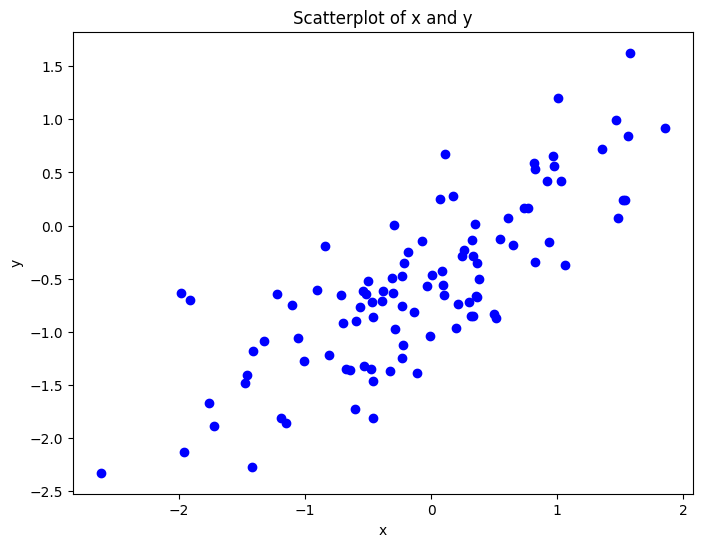

In [ ]:
# Creating a scatter plot for x and y
plt.figure(figsize=(8,6))
plt.scatter(x=x,y=y, c="blue")
plt.title("Scatterplot of x and y")
plt.xlabel("x")
plt.ylabel("y")

One can observe that the relationship of x and y is linear with a bit of noise. The variables seem positively correlated which means higher x values tend to have higher responses in the variable y.

## 2.3 Fitting First Linear Regression
Fit a least squares linear model LinearRegression() from (module linear model
of sklearn) to predict y using x. Comment on the model obtained:

(a) How do the estimations of ˆβ0 and ˆβ1 compare to β0 and β1 ?

(b) Display the least squares line on the scatterplot obtained in Subsection
2.2.

(c) Compute R2 statistics (using function r2 score from the sklearn.metrics
module).

Score: 0.6297598193059208
Intercept: [-0.49628609]
Coefficients: [[0.67837142]]
R^2 statistics: 0.6297598193059208


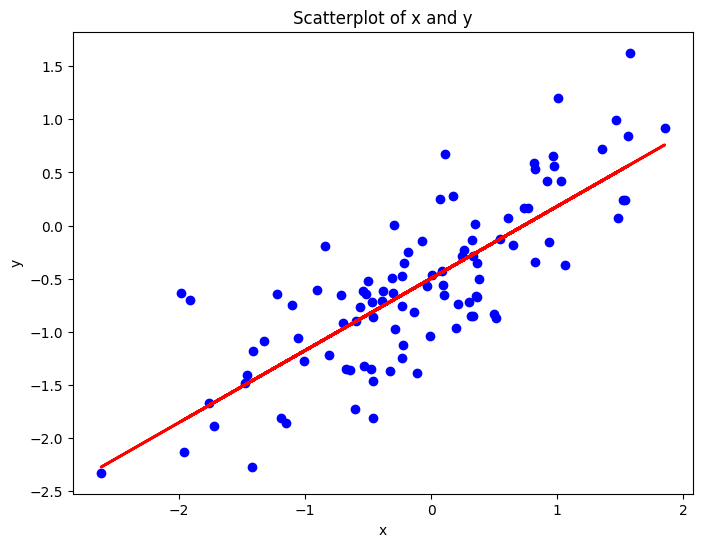

In [ ]:
# Fit linear regression model to x and y and get parameters of the model
reg = LinearRegression().fit(x, y)
score = reg.score(x, y)
coef = reg.coef_
intercept = reg.intercept_
predict = reg.predict(x)

print(f"Score: {score}")
# a) get estimates beta_0_hat and beta_1_hat of fitted model
print(f"Intercept: {intercept}")
print(f"Coefficients: {coef}")

# b) plot least squares line on scatter plot
plt.figure(figsize=(8,6))
plt.scatter(x=x,y=y, c="blue")
plt.title("Scatterplot of x and y")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, predict, color="red", linewidth=2)

# c) Compute R2 statistics (using function r2 score from the sklearn.metrics module)
r2 = r2_score(y, predict)
print(f"R^2 statistics: {r2}")

a) We see that the intercept (-0.496) is very close original intercept of the model (-0.5). The coefficient beta_1_hat (0.678) differs a bit more from the coefficient (0.75) of the original model. Overall the fitted linear regression model shows a reasonable good fit for the data.

c) The r^2 statistics show how well a model fits with higher r^2 values indicating a better fit. The r^2 value of 0.629 proves the reasonable good fit we have already seen in a).

## 2.4 Fitting Second Linear Regression
Now fit a polynomial regression model that predicts y using x and x2. Comment on the model obtained:

(a) What is the estimated value for ˆβ2?

(b) How do the estimations of ˆβ0 and ˆβ1 compare to β0 and β1 ?

(b) Display the least squares line on the scatterplot obtained in Subsection
2.2.

(d) Compute R2 statistics.

(e) Is there evidence that the quadratic term improves the model fit? Explain your answer.

Score: 0.6469951045504286
Intercept: [-0.56907057]
Coefficients: [[0.71212835 0.09221497]]
beta_2_hat: [[0.71212835 0.09221497]]
Model1 intercept: -0.4962860850680164
Model2 intercept: -0.5690705740231349
Model1 coefficients (beta_1_hat): [[0.67837142]]
Model2 coefficients (beta_1_hat, beta_2_hat): [[0.71212835 0.09221497]]
R^2 statistics: 0.6469951045504286
R^2 statistics Model1: 0.6297598193059208
R^2 statistics Model2: 0.6469951045504286


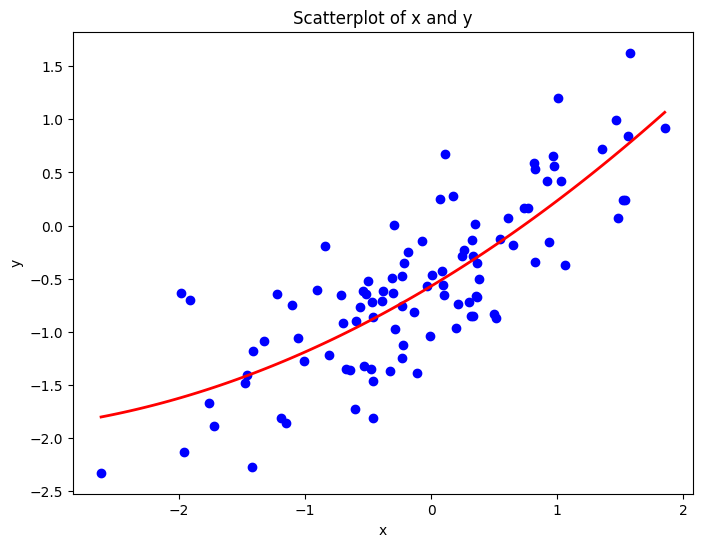

In [ ]:
# Creating polynomial data of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_matrix_poly = poly.fit_transform(x)
#print(X_matrix_poly)

# Fit the linear regression model with polynomial data and obtain model parameters
reg_2 = LinearRegression().fit(X_matrix_poly, y)
score_2 = reg_2.score(X_matrix_poly, y)
coef_2 = reg_2.coef_
intercept_2 = reg_2.intercept_

print(f"Score: {score_2}")
print(f"Intercept: {intercept_2}")
print(f"Coefficients: {coef_2}")


# a) estiamted value for beta_2_hat
print(f"beta_2_hat: {coef_2}")

# b) comaparison of intercepts and coefficients of former model
print(f"Model1 intercept: {reg.intercept_[0]}\nModel2 intercept: {reg_2.intercept_[0]}")
print(f"Model1 coefficients (beta_1_hat): {coef}\nModel2 coefficients (beta_1_hat, beta_2_hat): {coef_2}")

# Create evenly spaced and sorted values
X_matrix = np.linspace(min(x), max(x),100)
X_matrix_plot = poly.transform(X_matrix.reshape(-1,1))
predict_2 = reg_2.predict(X_matrix_plot)

# c) Display plot with least squares line
plt.figure(figsize=(8,6))
plt.scatter(x=x,y=y, c="blue")
plt.title("Scatterplot of x and y")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X_matrix, predict_2, color="red", linewidth=2)

# d) r^2 statistics
r2_2 = r2_score(y, reg_2.predict(X_matrix_poly))
print(f"R^2 statistics: {r2_2}")

# e) Improved model fit?
print(f"R^2 statistics Model1: {r2}\nR^2 statistics Model2: {r2_2}")

a) The estimated value for beta_2_hat for the polynomial model is 0.092.

b) The intercept beta_0_hat of the polynomial model is -0.569. This differs slightly more than the estimate of the linear model (-0.496) from the original model intercept -0.5 but still indicates a reasonable fit. The first coefficient bet_1_hat of the polynomial model is 0.712 which is closer than the coefficient of the linear model (0.678) to the original coefficient 0.75 and therefore indicates a better fit of the polynomial model regarding this coefficient.

d) The R^2 statistics of the polynomial model have the value 0.647.

e) According to the slightly higher R^2 value of polynomial model (0.647 vs. 0.629) we can observe that the polynomial term improves the goodness of fit of the model. However, the improvement is small and therefore a statistical test could be used to investigate if the improvement is statistically significant.

## 2.5 Second Data Generation
Using x and eps, generate a vector y according to the model:

y = −0.5 + 0.75x + x2 + eps

In [ ]:
y_2 = -0.5 + 0.75*x + x**2 + eps
print(len(y_2))

100


## 2.6 Second Data Visualization
Create a new scatterplot displaying the relationship between x and y. Comment on what you observe.

Text(0, 0.5, 'y')

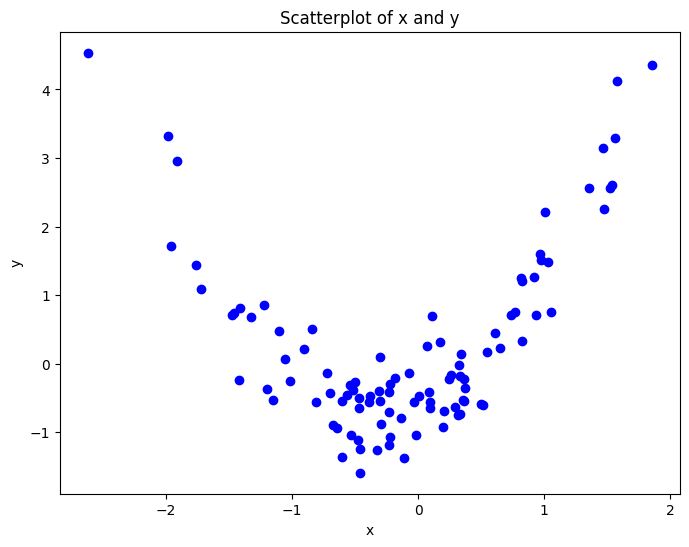

In [ ]:
# Creating a scatter plot for new data x and y
plt.figure(figsize=(8,6))
plt.scatter(x=x,y=y_2, c="blue")
plt.title("Scatterplot of x and y")
plt.xlabel("x")
plt.ylabel("y")

One can observe that due to the quadratic term x^2 in the new model, the relation of x and y is no longer linear. It shows that not just higher but also lower x values correspond to higher y values.

## 2.7 Fitting Third Linear Regression
Fit a least squares linear model LinearRegression() from the module linear model
to predict y using x. Comment on the model obtained:

(a) How do the estimations of ˆβ0 and ˆβ1 compare to β0 and β1 ?

(b) Display the least squares line on the scatterplot obtained in Subsection
2.6.

(c) Compute R2 statistics.

Score: 0.045956423052825435
Intercept: [0.29300534]
Coefficients: [[0.31230364]]
R^2 statistics: 0.045956423052825435


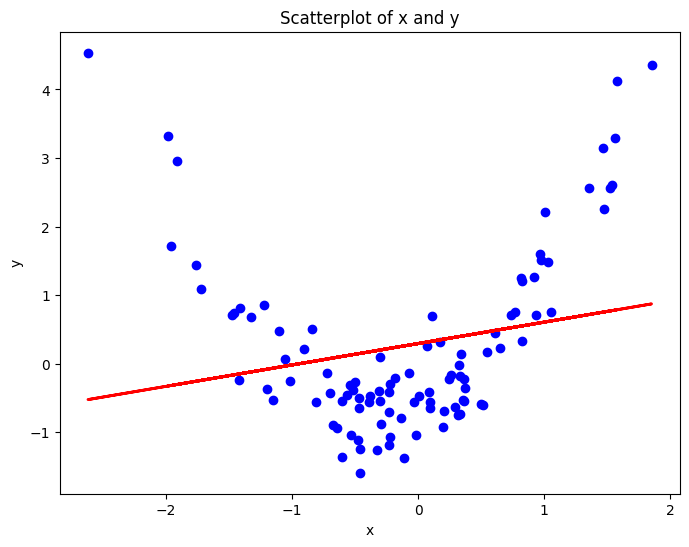

In [ ]:
# Reshape x and fit Linear Model
x_3 = np.array(x).reshape(-1,1)
#print(x_3)

# Fit linear regression model to new data and obtain model parameters
reg_3 = LinearRegression().fit(x_3, y_2)
score_3 = reg_3.score(x_3, y_2)
coef_3 = reg_3.coef_
intercept_3 = reg_3.intercept_
predict_3 = reg_3.predict(x_3)

print(f"Score: {score_3}")
print(f"Intercept: {intercept_3}")
print(f"Coefficients: {coef_3}")

# b) Display plot with least squares line
plt.figure(figsize=(8,6))
plt.scatter(x=x_3,y=y_2, c="blue")
plt.title("Scatterplot of x and y")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_3, predict_3, color="red", linewidth=2)

# d) r^2 statistics
r2_3 = r2_score(y_2, predict_3)
print(f"R^2 statistics: {r2_3}")

a) The intercept of the third linear regression model is 0.293. This value differs a lot from the original models intercept -0.5 which indicates a poor fit of the model. Also the estimated coefficient beta_1_hat (0.312) differs a lot from the according coefficent of the original model (0.75). This leads to the assumption that fitting a strictly linear model to data generated by a function of polynomial degree 2 leads to a poor fit of the model.

c) The r^2 statistics of this third linear regression model have the value 0.046. This very low r^2 value again shows the poor fit of the model.

## 2.8 Fitting Fourth Linear Regression
Now fit a polynomial regression model that predicts y using x and x2. Comment on the model obtained:

(a) How do the estimations of ˆβ0, ˆβ1, and ˆβ2 compare to β0, β1, and β2 ?

(b) Display the least squares line on the scatterplot obtained in Subsection
2.6.

(c) Compute R2 statistics.

(d) Is there evidence that the quadratic term improves the model fit? Ex-
plain your answer.

Score: 0.8784561474099984
Intercept: [-0.56907057]
Coefficients: [[0.71212835 1.09221497]]
R^2 statistics: 0.8784561474099984
R^2 statistics Model3: 0.045956423052825435
R^2 statistics Model4: 0.8784561474099984


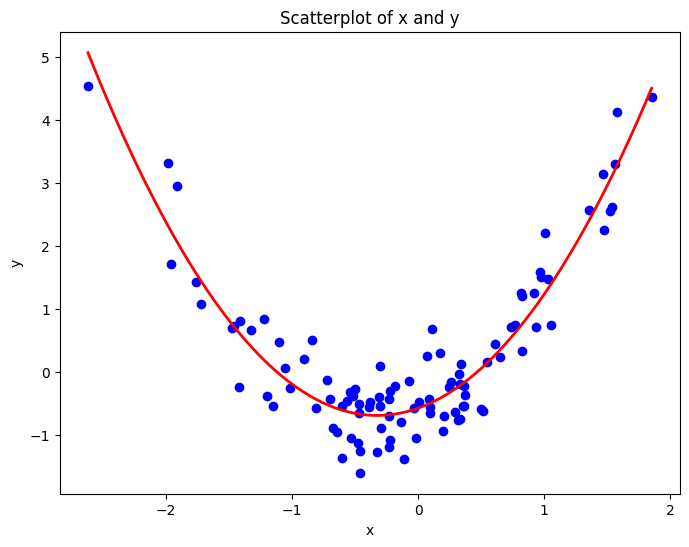

In [ ]:
# Create new polynomial feature matrix and fit model
poly = PolynomialFeatures(degree=2, include_bias=False)
X_matrix_poly_2 = poly.fit_transform(x.reshape(-1,1))

reg_4 = LinearRegression().fit(X_matrix_poly_2, y_2)
score_4 = reg_4.score(X_matrix_poly_2, y_2)
coef_4 = reg_4.coef_
intercept_4 = reg_4.intercept_

# Create evenly spaced and sorted values
X_matrix_2 = np.linspace(min(x), max(x),100)
X_matrix_plot_2 = poly.transform(X_matrix_2.reshape(-1,1))
predict_4 = reg_4.predict(X_matrix_plot_2)
#print(X_matrix)
#print(X_matrix_poly)

print(f"Score: {score_4}")
print(f"Intercept: {intercept_4}")
print(f"Coefficients: {coef_4}")

# b) Display plot with least squares line
plt.figure(figsize=(8,6))
plt.scatter(x=x,y=y_2, c="blue")
plt.title("Scatterplot of x and y")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X_matrix_2, predict_4, color="red", linewidth=2)

# d) r^2 statistics
r2_4 = r2_score(y_2, reg_4.predict(X_matrix_poly_2))
print(f"R^2 statistics: {r2_4}")

# e) Improved model fit?
print(f"R^2 statistics Model3: {r2_3}\nR^2 statistics Model4: {r2_4}")

a) The intercept of this model is -0.569 which is a pretty accurate estimate of the intercept of the original model (-0.5). The coefficient beta_1_hat (0.712) is also a reasonable close estimate of the according coefficient of the original model (0.75). The same thing shows for the estimate beta_2_hat (1.092) of the models coefficient (1.000). Overall, one can say that the estimated polynomial regression model shows a reasonable accurate fit.

c) The R^2 statistics of the polynomial model have the value 0.878. This again shows the accurate fit of the model.

d) According to the much higher R^2 score (0.878 vs. 0.046) of the polynomial model, we can say that the quadratic terms improves the model fit. Even without a statistical test it is obvious that this large improvement in the R^2 score is significant.

## 3 LASSO Regression Model Analysis
Repeat the asssignment from Section 2 by fitting Lasso regression models (use
the function Lasso() from the module linear model). What is the reason
for the poor performance of the Lasso models? How can it be improved?

Length of y: 100


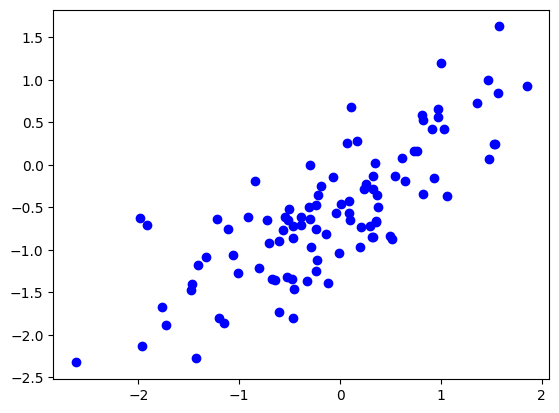

In [ ]:
np.random.seed(42)
# 1. creating vector x containing 100 observations drawn from a normal distribution with mean 0 and varaince of 1
x_L = np.random.normal(0,1, size=(100)).reshape((-1, 1))

# 2. create vector eps containing 100 observations drawn from normal distribution with mean 0 and variance 0.25
eps_L = np.random.normal(0, np.sqrt(0.25), size=(100)).reshape((-1, 1))

# 3 generate vector according to model y = -0.5+0.75x+eps
y_L = -0.5 + 0.75*x_L + eps_L
#print(f"y: {y}")
plt.scatter(x=x_L,y=y_L, c="blue")
# a) length of y
print(f"Length of y: {len(y_L)}")

Score: 0.6297598193059208
Intercept: [-0.49628609]
Coefficients: [[0.67837142]]
R^2 statistics: 0.6297598193059208


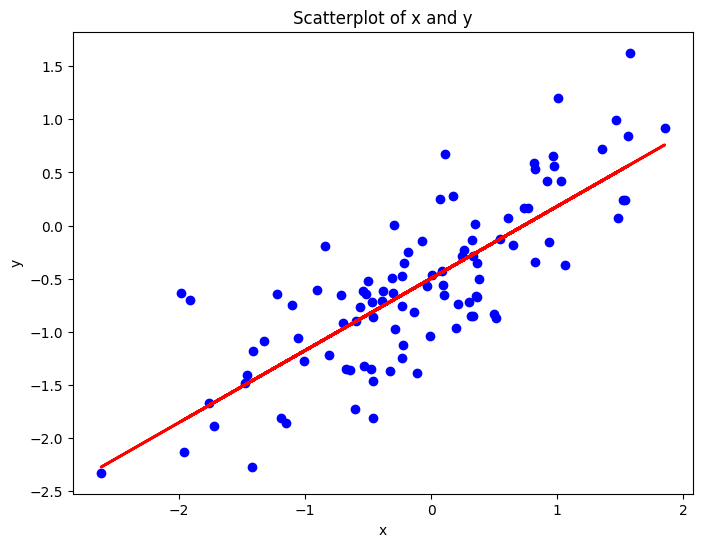

In [ ]:
# Fit Lasso model to the data and get model parameters
reg_L1 = Lasso().fit(x_L, y_L)
score_L1 = reg.score(x_L, y_L)
coef_L1 = reg.coef_
intercept_L1 = reg.intercept_
predict_L1 = reg.predict(x_L)

print(f"Score: {score}")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coef}")

# Display plot with least squares line
plt.figure(figsize=(8,6))
plt.scatter(x=x_L,y=y_L, c="blue")
plt.title("Scatterplot of x and y")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_L, predict_L1, color="red", linewidth=2)

# c) Compute R2 statistics (using function r2 score from the sklearn.metrics module)
r2_L1 = r2_score(y_L, predict_L1)
print(f"R^2 statistics: {r2_L1}")

Score: 0.0
Intercept: [-0.56673259]
Coefficients: [ 0. -0.]
beta_2_hat: [ 0. -0.]
Model1 intercept: -0.5667325945206083
Model2 intercept: -0.5667325945206083
Model1 coefficients (beta_1_hat): [[0.67837142]]
Model2 coefficients (beta_1_hat, beta_2_hat): [ 0. -0.]
R^2 statistics: 0.0
R^2 statistics Model1: 0.6297598193059208
R^2 statistics Model2: 0.0


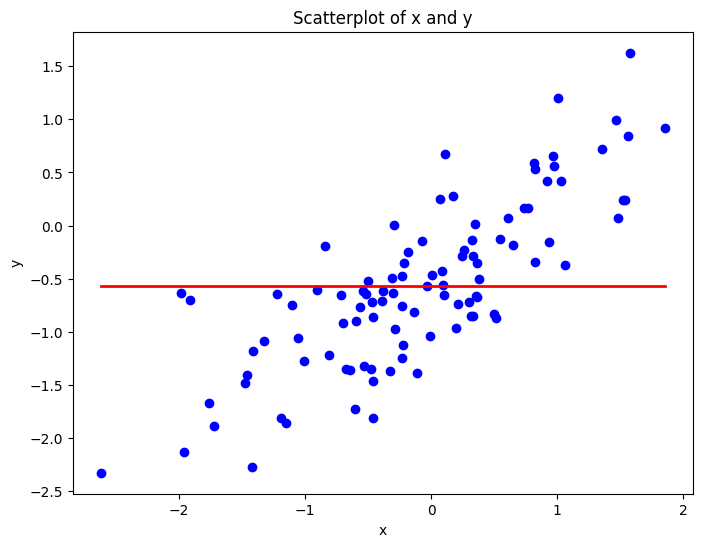

In [ ]:
# Creating polynomial data of degree 2
poly_L2 = PolynomialFeatures(degree=2, include_bias=False)
X_matrix_poly_L2 = poly_L2.fit_transform(x_L)

#print(x_matrix)
# Fit lasso model to polynomial data and obtain model parameters
reg_2_L2 = Lasso().fit(X_matrix_poly_L2, y_L)
score_2_L2 = reg_2_L2.score(X_matrix_poly_L2, y_L)
coef_2_L2 = reg_2_L2.coef_
intercept_2_L2 = reg_2_L2.intercept_

print(f"Score: {score_2_L2}")
print(f"Intercept: {intercept_2_L2}")
print(f"Coefficients: {coef_2_L2}")

# a) estiamted value for beta_2_hat
print(f"beta_2_hat: {coef_2_L2}")

# b) comaparison of intercepts and coefficients of former model -> actually compare with original intercept and coefficient
print(f"Model1 intercept: {reg_L1.intercept_[0]}\nModel2 intercept: {reg_2_L2.intercept_[0]}")
print(f"Model1 coefficients (beta_1_hat): {coef_L1}\nModel2 coefficients (beta_1_hat, beta_2_hat): {coef_2_L2}")

# Create evenly spaced and sorted values
X_matrix_L2 = np.linspace(min(x_L), max(x_L), 100)
X_matrix_plot_L2 = poly_L2.transform(X_matrix_L2.reshape(-1,1))
predict_2_L2 = reg_2_L2.predict(X_matrix_plot_L2)

# c) Display plot with least squares line
plt.figure(figsize=(8,6))
plt.scatter(x=x_L,y=y_L, c="blue")
plt.title("Scatterplot of x and y")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X_matrix_L2, predict_2_L2, color="red", linewidth=2)

# d) r^2 statistics
r2_2_L2 = r2_score(y_L, reg_2_L2.predict(X_matrix_poly_2))
print(f"R^2 statistics: {r2_2_L2}")

# e) Improved model fit?
print(f"R^2 statistics Model1: {r2_L1}\nR^2 statistics Model2: {r2_2_L2}")

In [ ]:
y_L2 = -0.5 + 0.75*x + x**2 + eps
print(len(y_L2))

100


Score: 0.045956423052825435
Intercept: [0.29300534]
Coefficients: [[0.31230364]]
R^2 statistics: 0.045956423052825435


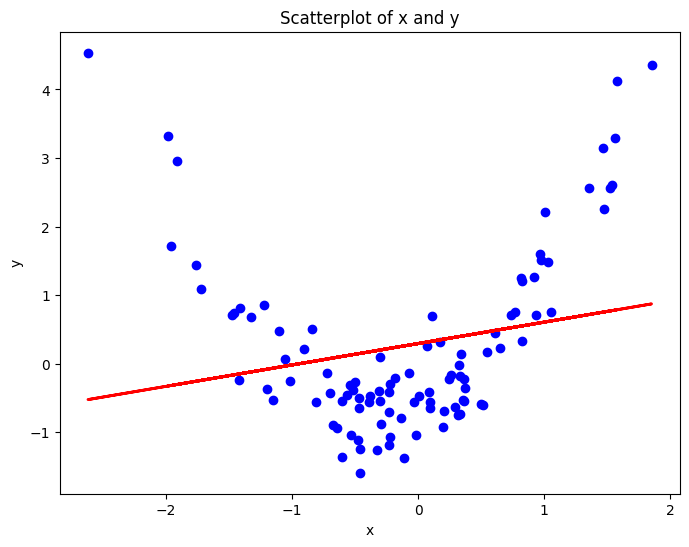

In [ ]:
# Reshape x and fit Linear Model
x_3_L3 = np.array(x_L).reshape(-1,1)
#print(x_3)

# Fit Lasso model to new data and obtain model parameters
reg_3_L3 = LinearRegression().fit(x_3_L3, y_L2)
score_3_L3 = reg_3_L3.score(x_3_L3, y_L2)
coef_3_L3 = reg_3_L3.coef_
intercept_3_L3 = reg_3_L3.intercept_
predict_3_L3 = reg_3_L3.predict(x_3_L3)

print(f"Score: {score_3_L3}")
print(f"Intercept: {intercept_3_L3}")
print(f"Coefficients: {coef_3_L3}")

# b) Display plot with least squares line
plt.figure(figsize=(8,6))
plt.scatter(x=x_3_L3,y=y_L2, c="blue")
plt.title("Scatterplot of x and y")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_3_L3, predict_3_L3, color="red", linewidth=2)

# d) r^2 statistics
r2_3_L3 = r2_score(y_L2, predict_3_L3)
print(f"R^2 statistics: {r2_3_L3}")

Score: 0.22174566041186106
Intercept: [0.1178552]
Coefficients: [0.         0.17250987]
R^2 statistics: 0.22174566041186106
R^2 statistics Model3: 0.045956423052825435
R^2 statistics Model4: 0.22174566041186106


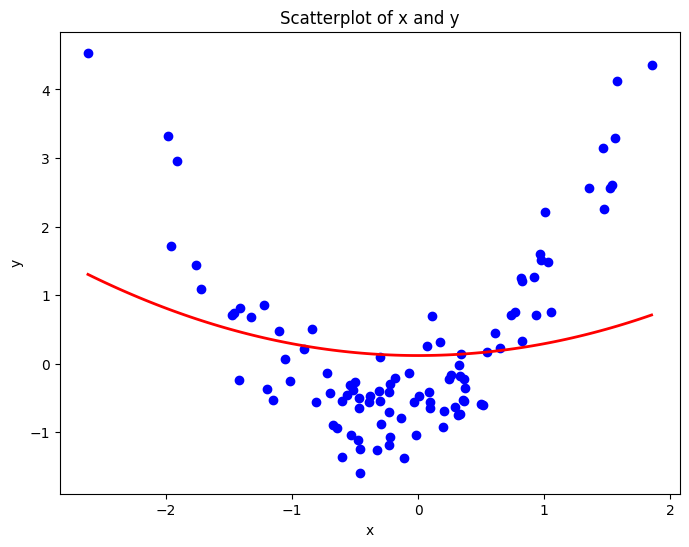

In [ ]:
# Create new polynomial feature matrix and fit model
poly_L4 = PolynomialFeatures(degree=2, include_bias=False)
X_matrix_poly_L4 = poly_L4.fit_transform(x_L.reshape(-1,1))

reg_4_L4 = Lasso().fit(X_matrix_poly_L4, y_L2)
score_4_L4 = reg_4_L4.score(X_matrix_poly_L4, y_L2)
coef_4_L4 = reg_4_L4.coef_
intercept_4_L4 = reg_4_L4.intercept_


print(f"Score: {score_4_L4}")
print(f"Intercept: {intercept_4_L4}")
print(f"Coefficients: {coef_4_L4}")

# Create evenly spaced and sorted values
X_matrix_L4 = np.linspace(min(x_L), max(x_L), 100)
X_matrix_plot_L4 = poly_L4.transform(X_matrix_L4.reshape(-1,1))
predict_4_L4 = reg_4_L4.predict(X_matrix_plot_L4)

# b) Display plot with least squares line
plt.figure(figsize=(8,6))
plt.scatter(x=x_L,y=y_L2, c="blue")
plt.title("Scatterplot of x and y")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X_matrix_L4, predict_4_L4, color="red", linewidth=2)

# d) r^2 statistics
r2_4_L4 = r2_score(y_L2, reg_4_L4.predict(X_matrix_poly_L4))
print(f"R^2 statistics: {r2_4_L4}")

# e) Improved model fit?
print(f"R^2 statistics Model3: {r2_3_L3}\nR^2 statistics Model4: {r2_4_L4}")

Poor performance of Lasso models:

The main reason for the poor performance of the Lasso models is due to the regularization term. Lasso uses L1-regularization which ecourages sparsity in the models. This means that some parameters of the model are shrinked towards 0 and therefore perform a kind of feature selection. If however all features of the model are relevant to display the true underlying relationship, then forcing some paramters to zero will result in a poor fit of the Lasso model. Especially in the solely linear model we observed a positive correlation between the variables x and y. This correlation can not be modelled by the Lasso model if important features are excluded. The performance of the Lasso model for the polynomial data of degree 2 is slightly better but according to the regularization term still far worse than the performance of the former linear regression model.

Improvement of Lasso models:

One way of improving the performance of the Lasso models is hyperparameter tuning. The degree of regularization of the Lasso models is determined by the parameter alpha (for this lab the default value 1.0 is used). A lower value for alpha (e.g. 0.1) leads to a less strict regularization and therefore more influence of the features of the model what can improve the model fit in these cases.